# 線形回帰 (liner regression)

In [7]:
# ライブラリの読み込み
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
rand = np.random

In [8]:
# ハイパーパラメータの設定
learning_rate = 0.01# 学習率(学習時の勾配降下法の学習する係数)
training_epochs = 1000 # トレーニング回数(1000回トレーニングをする)
display_step = 50 # 結果を表示数するステップ数(50トレーニング毎に結果を表示)

In [10]:
# トレーニングデータの作成
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0] # トレーニング数

In [11]:
# グラフの入力 X, Y を定義
# (placeholderはSession内での実行時に値を設定できる)
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [12]:
# モデルの重みW とバイアスb の初期値を設定
# (VariableはSession内での実行時に値を更新する変数を格納する)
W = tf.Variable(rand.randn(), name="weight")
b  = tf.Variable(rand.randn(), name="bias")

In [13]:
# 線形モデルの定義
predict = tf.add(tf.mul(X, W), b)

In [14]:
# 2乗和誤差 (mean squared error)
cost = tf.reduce_sum(tf.pow(predict - Y, 2)) / (2 * n_samples)

補足: 2乗和誤差(mean squared error)

$$
E = \frac {1}{2m} sum_{i=1}^m (Ypred_i - Y_i )^2
$$

In [15]:
# 勾配降下 (Gradient descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
# 変数の初期化(おきまり)
init = tf.initialize_all_variables()

In [44]:
# グラフを起動し、トレーニングを実施

# 結果を保持
result_costs = []
result_W = None
result_b = None


with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs): # エポック数(1000回)ループ
        for (x, y) in zip(train_X, train_Y): # すべてのトレーニングセットをループ
            sess.run(optimizer, feed_dict={X: x, Y: y}) # placeholder X, Y  にデータをセットして勾配計算する

        # 現状のコスト関数を表示
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            result_costs.append(c)
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                      "W=", sess.run(W), "b=", sess.run(b))

    print("最適化完了!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    result_W = sess.run(W)
    result_b  = sess.run(b)
    print("Training cost=", training_cost, "W=", result_W, "b=", result_b, "\n")

Epoch: 0050 cost= 0.454950422 W= 0.593157 b= -1.6701
Epoch: 0100 cost= 0.411300629 W= 0.572724 b= -1.52311
Epoch: 0150 cost= 0.372690797 W= 0.553506 b= -1.38486
Epoch: 0200 cost= 0.338537693 W= 0.535431 b= -1.25483
Epoch: 0250 cost= 0.308328122 W= 0.518431 b= -1.13253
Epoch: 0300 cost= 0.281607121 W= 0.502442 b= -1.01751
Epoch: 0350 cost= 0.257970631 W= 0.487404 b= -0.909323
Epoch: 0400 cost= 0.237063572 W= 0.47326 b= -0.807575
Epoch: 0450 cost= 0.218570396 W= 0.459958 b= -0.711877
Epoch: 0500 cost= 0.202212840 W= 0.447446 b= -0.621871
Epoch: 0550 cost= 0.187744141 W= 0.435679 b= -0.537218
Epoch: 0600 cost= 0.174946353 W= 0.424612 b= -0.457601
Epoch: 0650 cost= 0.163626403 W= 0.414202 b= -0.382718
Epoch: 0700 cost= 0.153613850 W= 0.404412 b= -0.312288
Epoch: 0750 cost= 0.144757688 W= 0.395205 b= -0.246048
Epoch: 0800 cost= 0.136924401 W= 0.386544 b= -0.183748
Epoch: 0850 cost= 0.129995927 W= 0.378399 b= -0.125152
Epoch: 0900 cost= 0.123867683 W= 0.370739 b= -0.0700418
Epoch: 0950 cost=

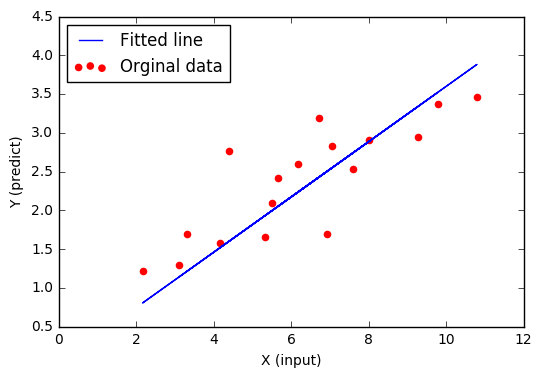

In [45]:
# データのプロットと線形回帰モデルのプロット
plt.scatter(train_X, train_Y, marker='o', color='r', label="Orginal data")
plt.plot(train_X, result_W * train_X + result_b, label="Fitted line")
plt.legend(loc='upper left')
plt.xlabel('X (input)')
plt.ylabel('Y (predict)')
plt.show()

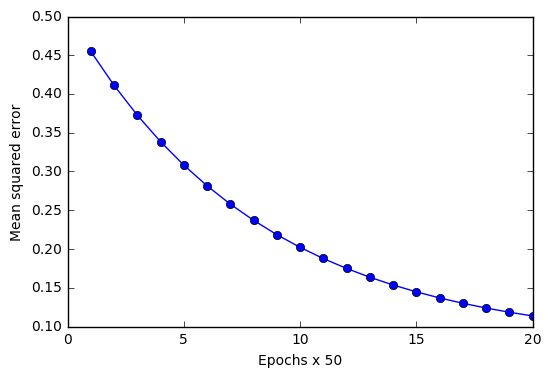

In [64]:
# 学習曲線のプロット
epochx50 = range(1, len(result_costs) + 1, 1)
plt.plot(epochx50, result_costs, marker='o')
plt.xlabel('Epochs x 50')
plt.ylabel('Mean squared error')
plt.show()